In [72]:
import pandas as pd
import numpy as np

- Loading the libraries for the project

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Task to be performed:
#### 1.	Preliminary analysis:
#### a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.


### Loading the data

In [74]:
url="1645792390_cep1_dataset.xlsx"
hcare =pd.read_excel(url)

In [6]:
hcare.shape

(303, 14)

In [75]:
# Viewing the dataset 
hcare.sample(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0


- Dataset has 13 features and 1 target variable

In [76]:
hcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- All the features are in numerical datatypes, though some may be ordinal features

- Checking for missing values

In [77]:
hcare.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### No missing values are in the dataset

#### Checking for duplicate values

In [78]:
hcare.duplicated().sort_values()

0      False
205    False
204    False
203    False
202    False
       ...  
97     False
96     False
102    False
302    False
164     True
Length: 303, dtype: bool

#### row 164 is duplicated which we will remove

In [79]:
hcare.drop_duplicates(inplace=True)
hcare.duplicated().any()

False

#### No duplicated values now!

2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [80]:
hcare.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [81]:
# Picking features based on values which are less than 10
categorical_features = hcare.loc[:, (hcare < 10).any()].columns.to_list()
categorical_features

['sex',
 'cp',
 'fbs',
 'restecg',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

#### Confirming with number of uniques

In [82]:
hcare[categorical_features].nunique()

sex         2
cp          4
fbs         2
restecg     3
exang       2
oldpeak    40
slope       3
ca          5
thal        4
target      2
dtype: int64

In [83]:
# Dropping oldpeak as it contains over 40 unique entries
categorical_features.remove('oldpeak')

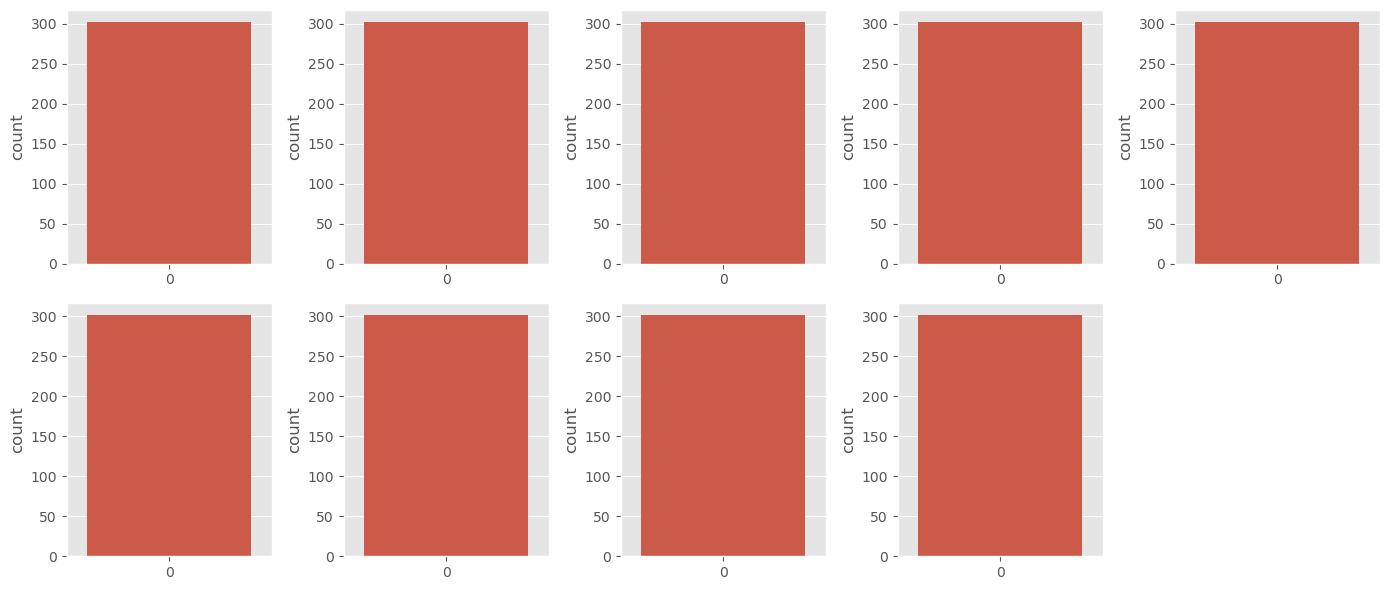

In [84]:
plt.figure(figsize=(14,6))
for i,features in enumerate(categorical_features):
    plt.subplot(2,5,i+1)
    sns.countplot(hcare[features])
    plt.tight_layout()

### c.	Study the occurrence of CVD across the Age category

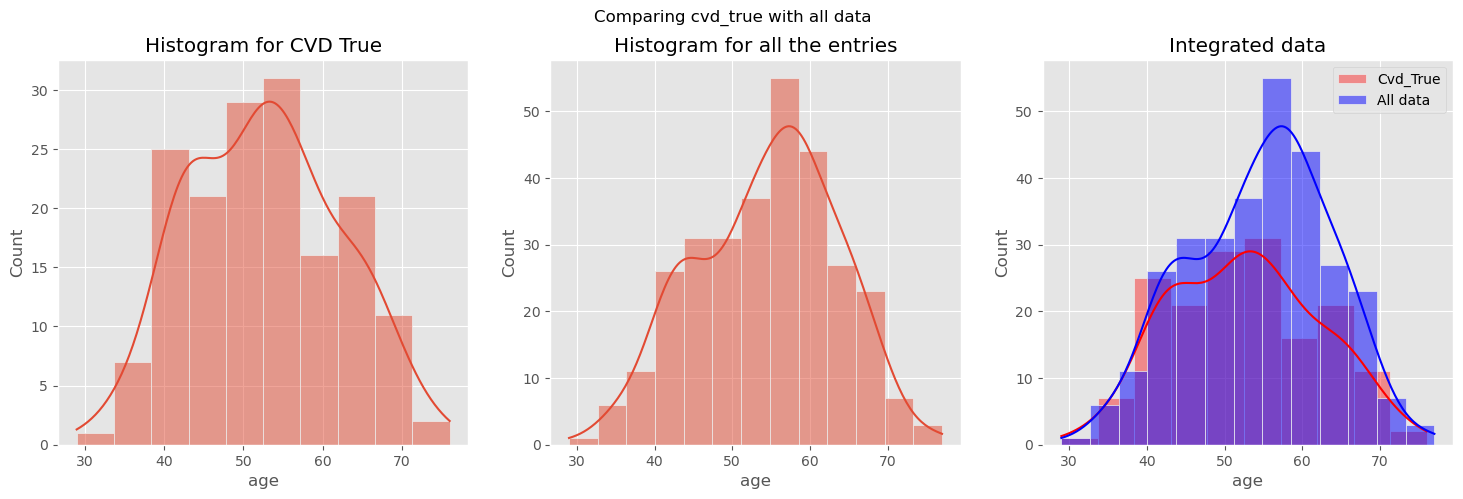

In [85]:
# Here we have data for only cvd true entries
cvd_true = hcare.loc[hcare.target == 1]

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.histplot(x=cvd_true.age,kde=True)
plt.title('Histogram for CVD True')
plt.subplot(1,3,2)
sns.histplot(x=hcare.age,kde=True)
plt.title('Histogram for all the entries')
plt.subplot(1,3,3)
sns.histplot(x=cvd_true.age,kde=True,label='Cvd_True',color='red',alpha=0.4)
sns.histplot(x=hcare.age,kde=True,label='All data',color='blue',alpha=0.5)
plt.title('Integrated data')
plt.legend()
plt.suptitle('Comparing cvd_true with all data')
plt.show()

### d.	Study the composition of all patients with respect to the Sex category

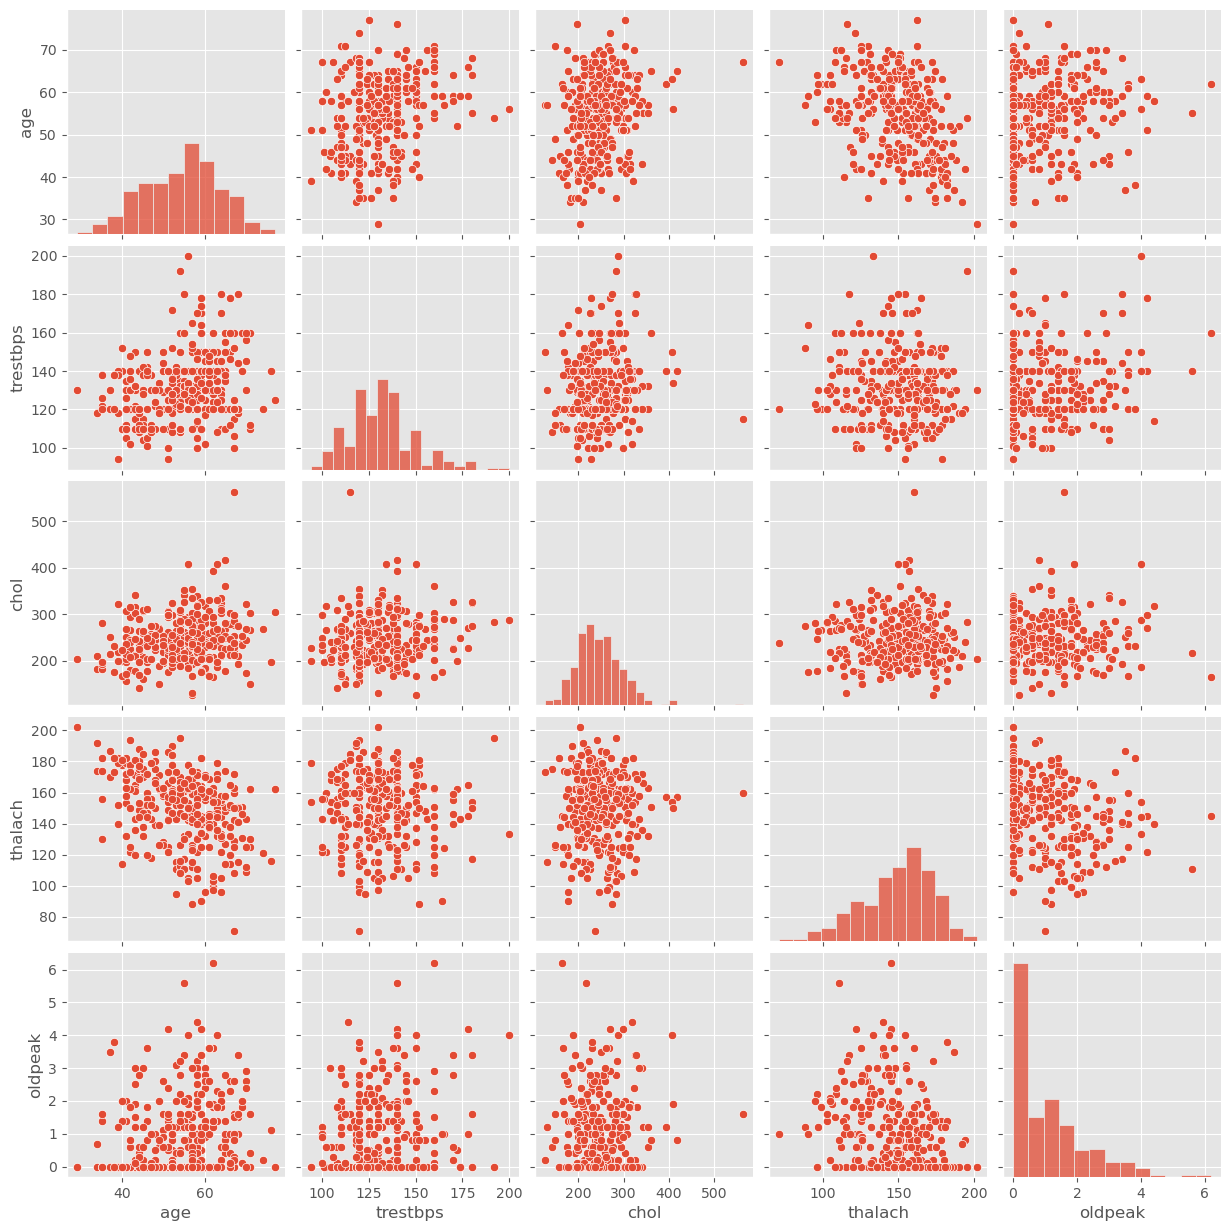

In [86]:
subData = hcare[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)

#### e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [87]:
# Creating a new dataframe with cvd: False
cvd_false = hcare.loc[hcare.target == 0]

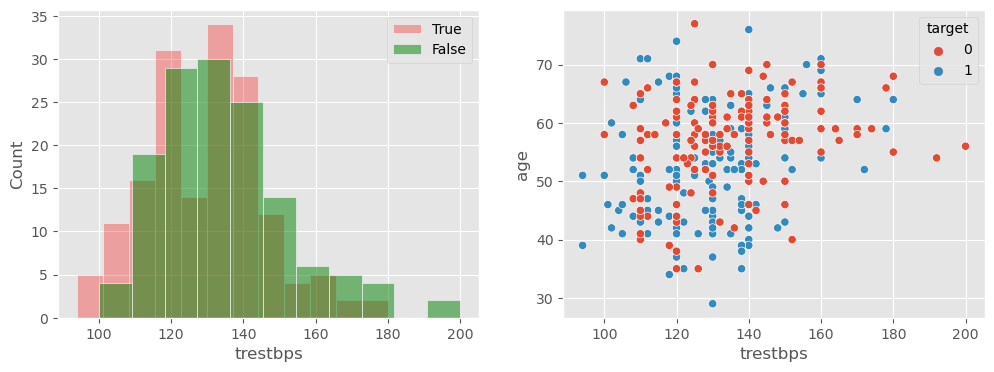

In [88]:
plt.figure(figsize=(25,4))
# PLOTTING SUBPLOT_1
plt.subplot(1,4,1)
sns.histplot(cvd_true.trestbps,color='red',alpha=0.3, label='True')
sns.histplot(cvd_false.trestbps,color='green',alpha=0.5,label='False')
plt.legend()

plt.subplot(1,4,2)
sns.scatterplot(y=hcare.age, x=hcare.trestbps,hue=hcare.target)
plt.show()

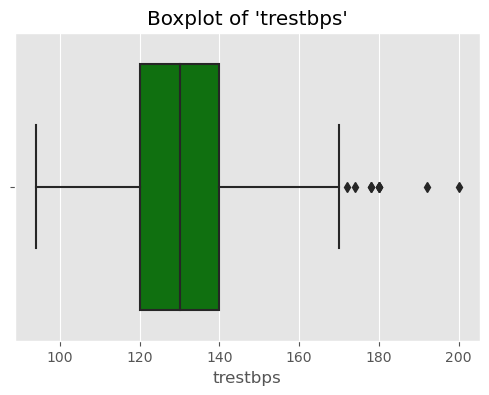

In [89]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=hcare, x='trestbps', color='green')
plt.title("Boxplot of 'trestbps'")
plt.show()

- We observe that people who develop CVD have lower resting bp than people who don't develop CVD, and most develop in the age around 40 - 65

#### f.	Describe the relationship between cholesterol levels and a target variable

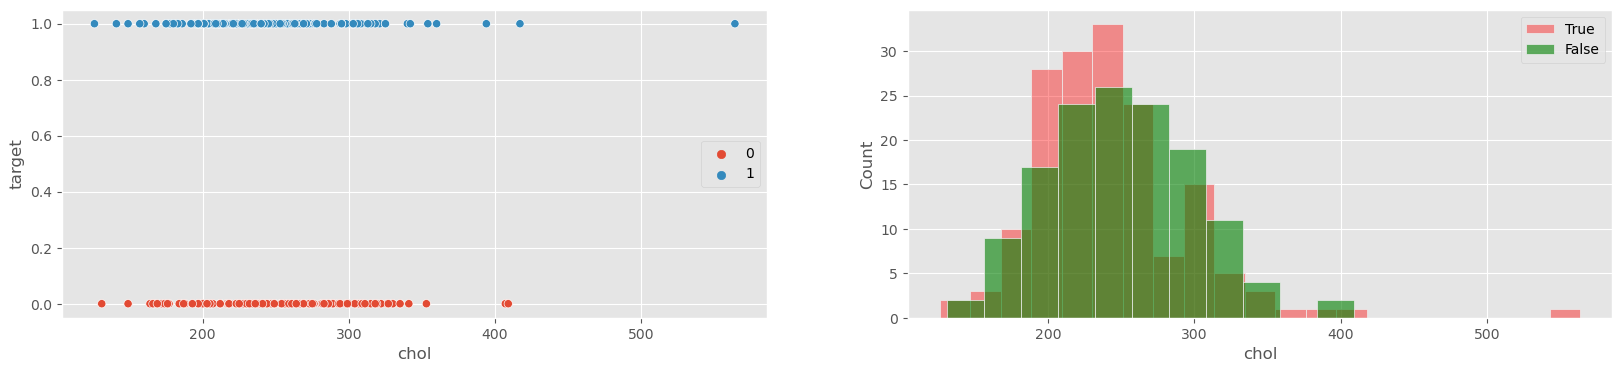

In [90]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.scatterplot(x=hcare.chol, y=hcare.target, hue=hcare.target)
plt.legend(loc='center right')

plt.subplot(122)
sns.histplot(cvd_true.chol, color='r',alpha=0.4,label='True')
sns.histplot(cvd_false.chol, color='green',alpha=0.6,label='False')
plt.legend()

- The people who develop CVD have much higher level of cholestrol sometimes and most are concentrated in the range of 200 - 300

#### g.	State what relationship exists between peak exercising and the occurrence of a heart attack

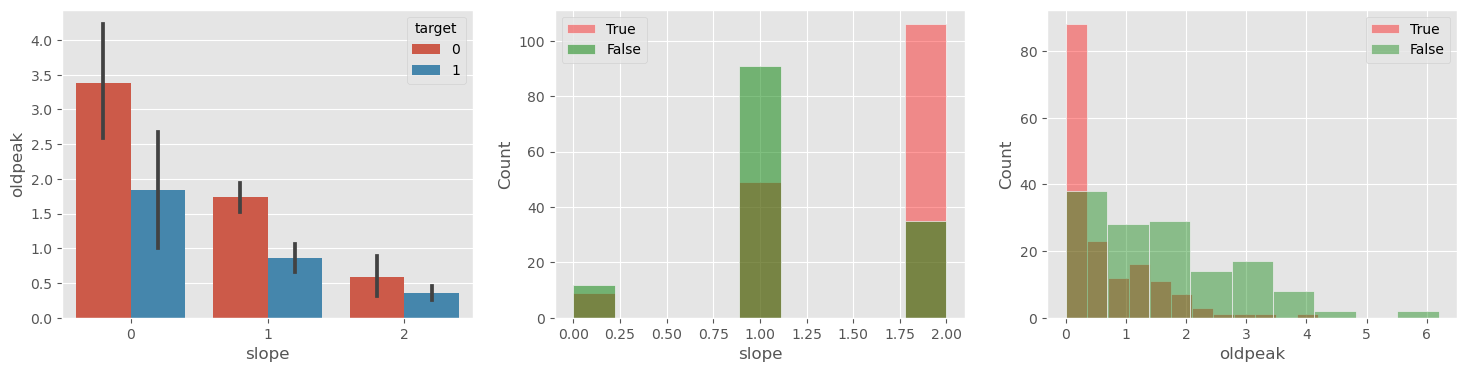

In [91]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.barplot(y=hcare.oldpeak, x=hcare.slope, hue=hcare.target)
plt.subplot(1,3,2)
sns.histplot(cvd_true.slope,color='red',alpha=0.4,label='True')
sns.histplot(cvd_false.slope,color='green',alpha=0.5,label='False')
plt.legend()
plt.subplot(1,3,3)
sns.histplot(cvd_true.oldpeak,color='red',alpha=0.4,label='True')
sns.histplot(cvd_false.oldpeak,color='green',alpha=0.4,label='False')
plt.legend()

- oldpeak is lower in people who developed CVD, slope: 2 was highest

#### h.	Check if thalassemia is a major cause of CVD

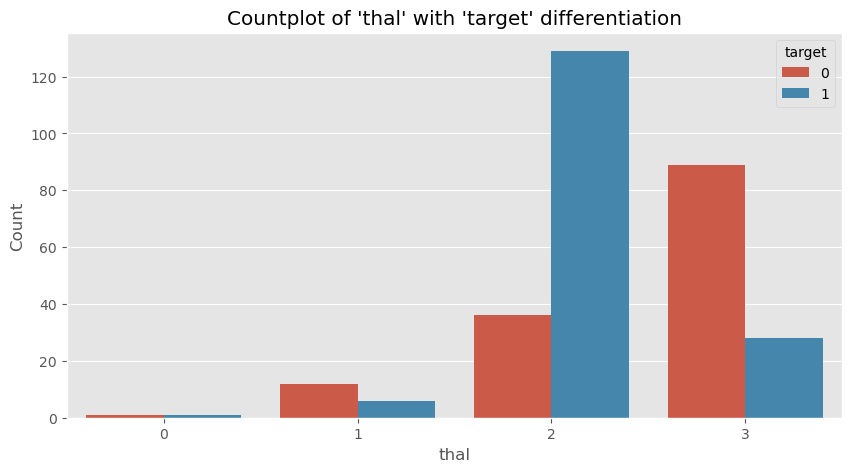

In [92]:
plt.figure(figsize=(10, 5))
sns.countplot(data=hcare, x='thal', hue='target')
plt.title("Countplot of 'thal' with 'target' differentiation")
plt.xlabel('thal')
plt.ylabel('Count')
plt.legend(title='target')
plt.show()

- Thalassemia can be a major cause in CVD as it is seen in more number in 2

#### j.	Use a pair plot to understand the relationship between all the given variables

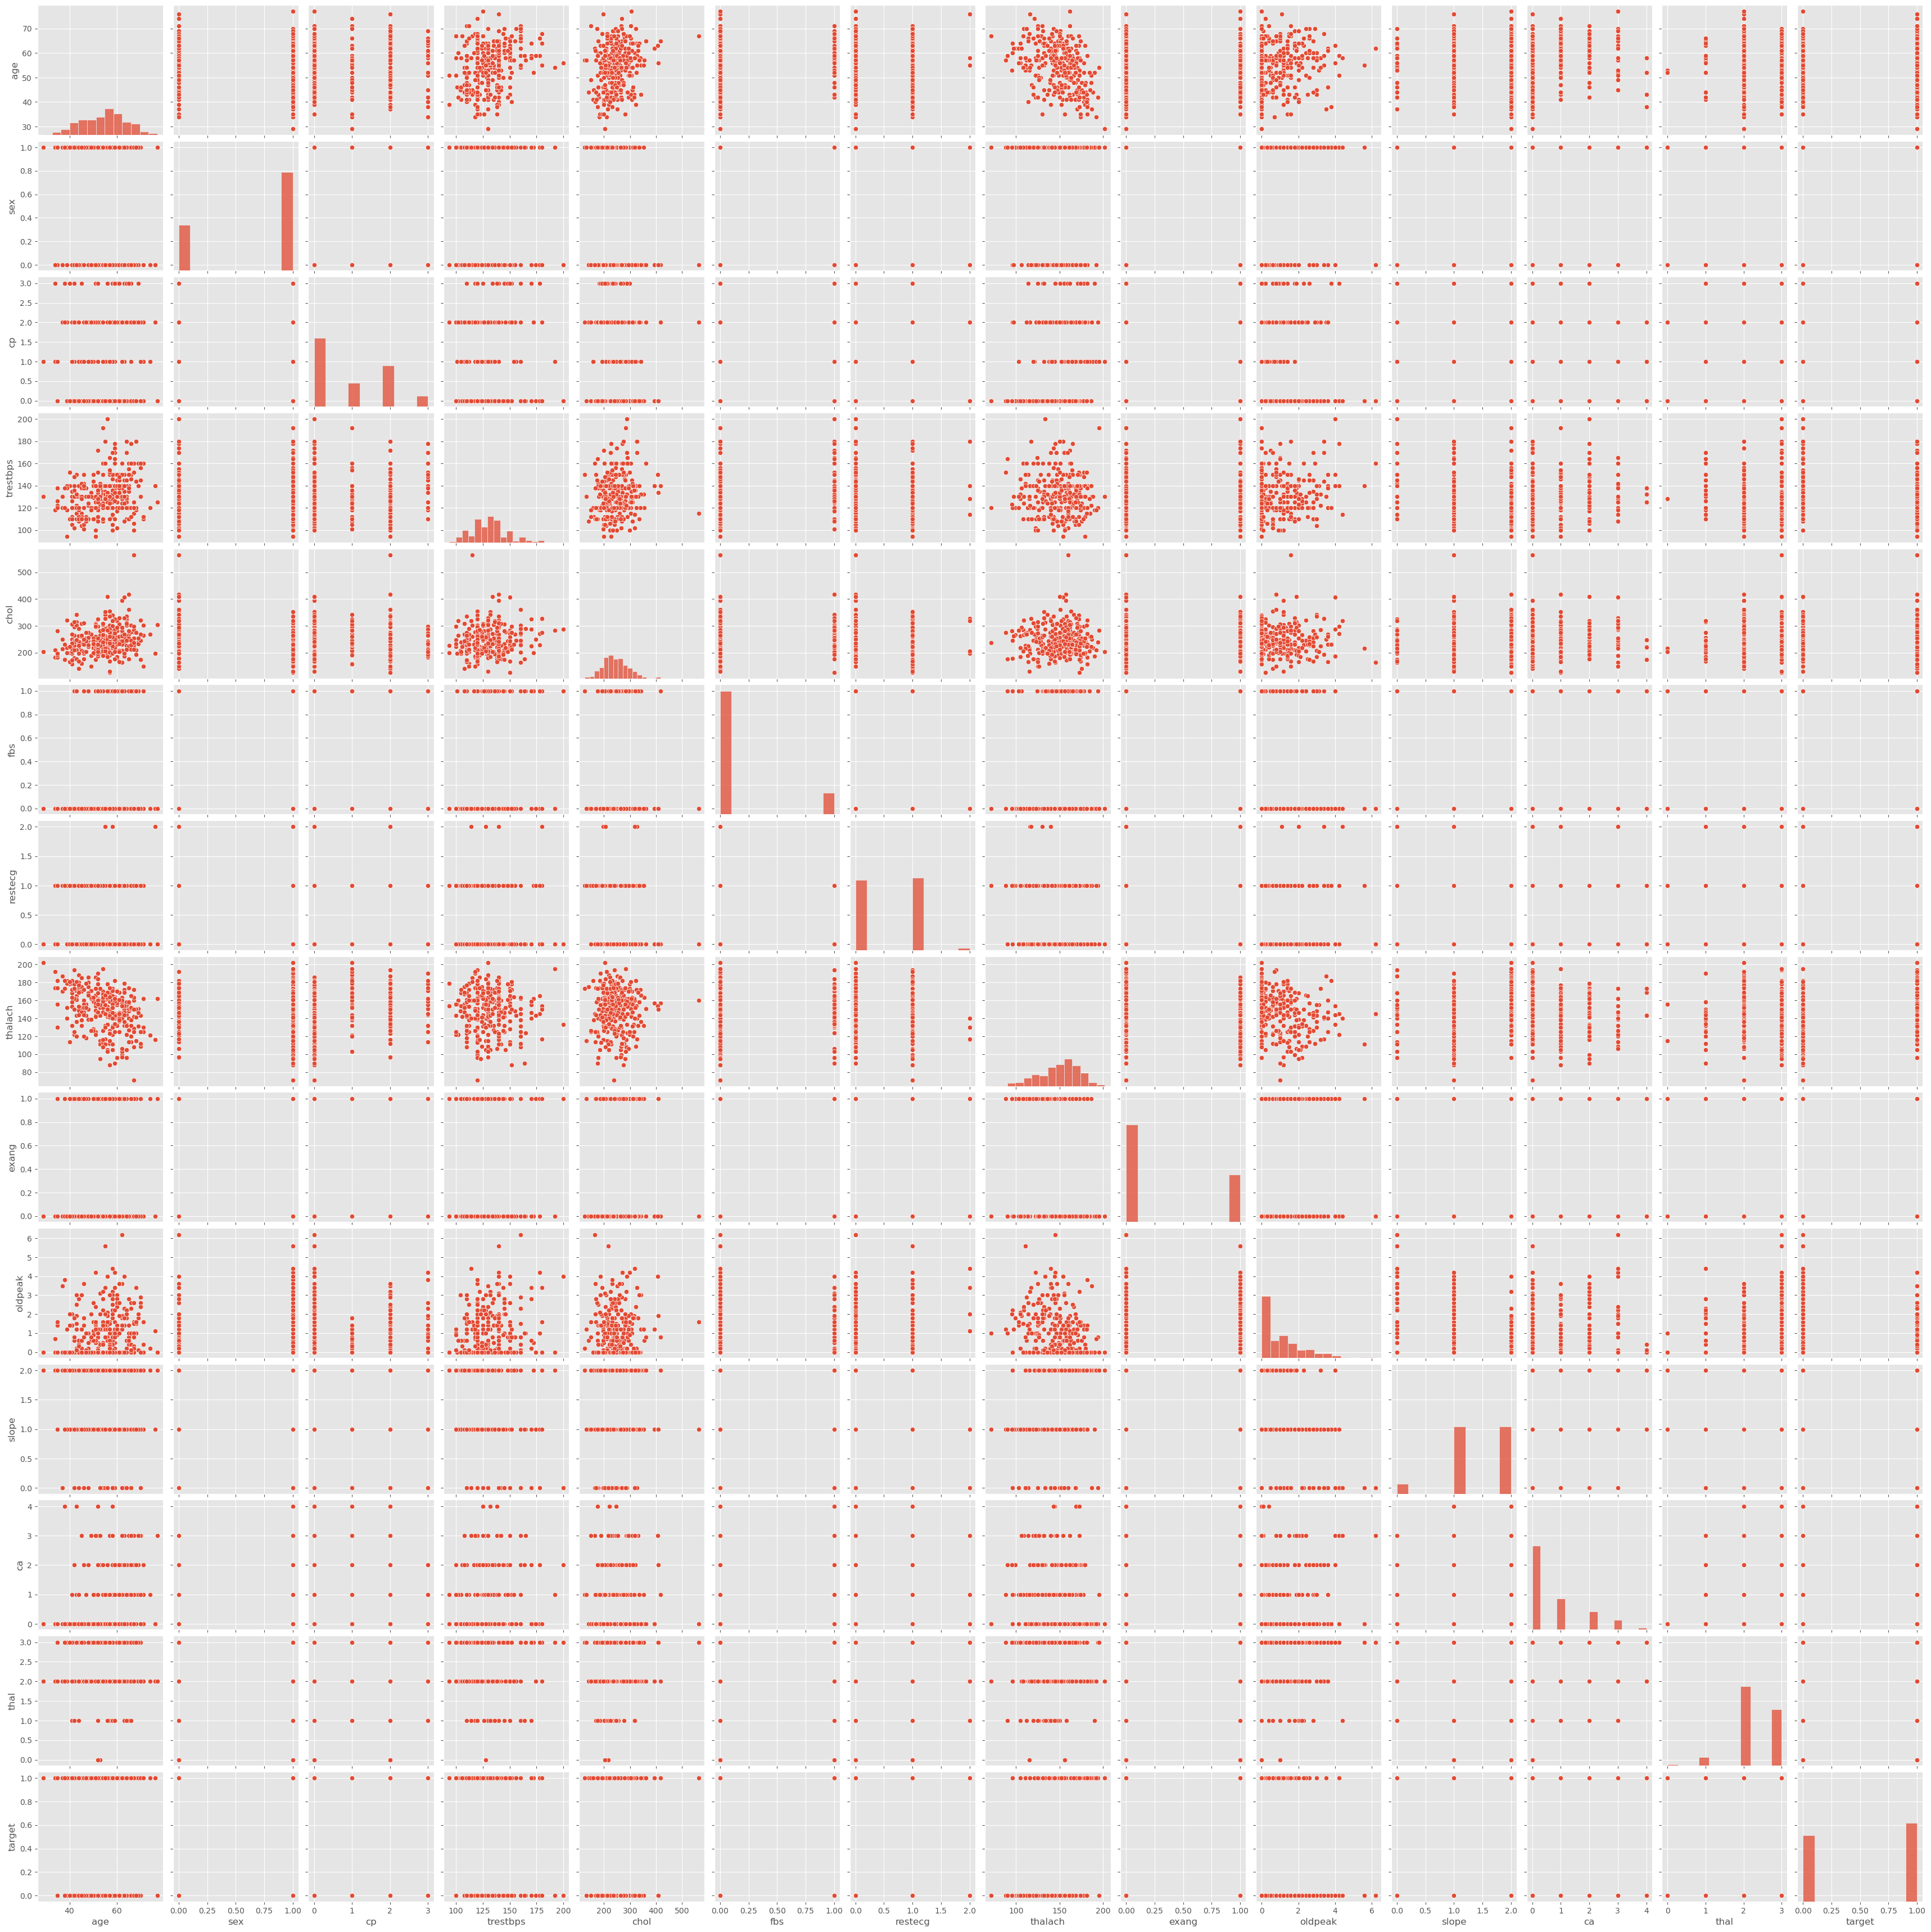

In [93]:
sns.pairplot(data=hcare)

### 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

#### Plotting a heatmap for correlation

<Axes: >

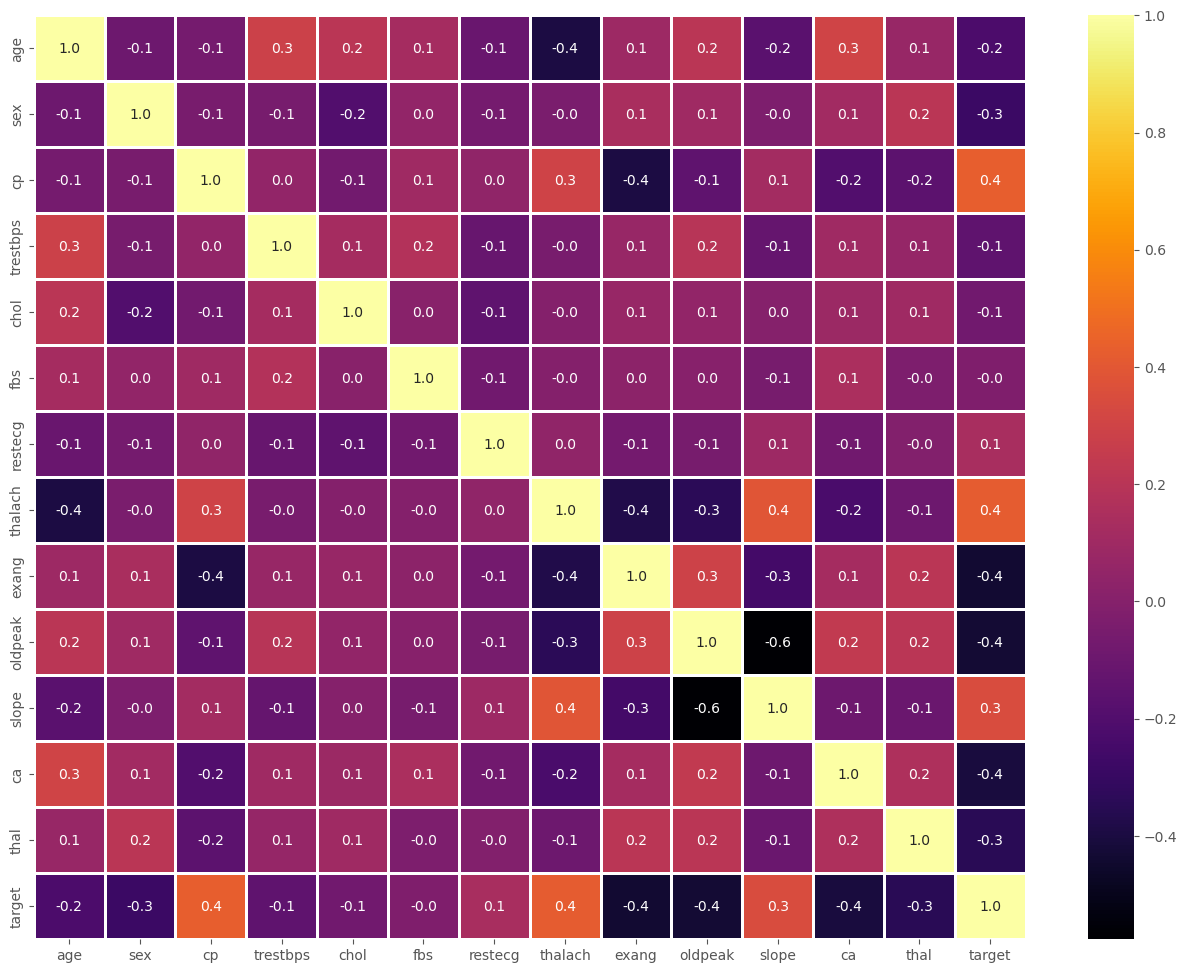

In [94]:
plt.figure(figsize=(16,12))
sns.heatmap(hcare.corr(),annot=True, fmt='.1f', linecolor='white',linewidths= 1.001,cmap='inferno')

### Training and testing

In [95]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [96]:
y = hcare.pop('target')
X = hcare

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 4)

print('X_train:',X_train.shape)
print('X_test :',X_test.shape)
print('y_train:',y_train.shape)
print('y_test :',y_test.shape)

X_train: (211, 13)
X_test : (91, 13)
y_train: (211,)
y_test : (91,)


In [98]:
import statsmodels.api as sm
logreg = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.349166
         Iterations 7


In [99]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  211
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                           12
Date:                Tue, 31 Oct 2023   Pseudo R-squ.:                  0.4953
Time:                        18:18:08   Log-Likelihood:                -73.674
converged:                       True   LL-Null:                       -145.97
Covariance Type:            nonrobust   LLR p-value:                 7.087e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0359      0.025      1.443      0.149      -0.013       0.085
sex           -1.6155      0.527     -3.067      0.002      -2.648      -0.583
cp             0.7427      0.226      3.293      0.0

In [100]:
logreg_pred = logreg.predict(X_test)
preds = list(map(round, logreg_pred))

Accuracy score 0.8021978021978022
Recall score 0.8867924528301887
Precision score 0.7966101694915254
f1 score 0.8392857142857143


<Axes: >

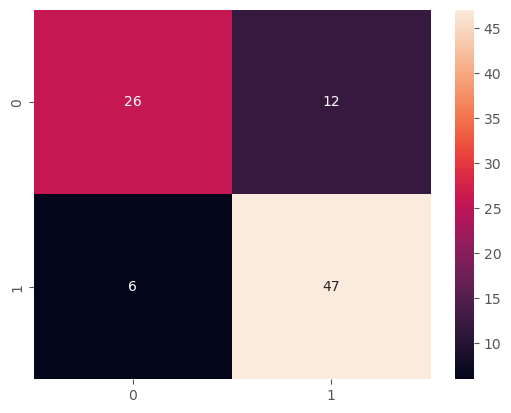

In [101]:
print('Accuracy score',accuracy_score(y_test, preds))
print('Recall score',recall_score(y_test, preds))
print('Precision score',precision_score(y_test, preds))
print('f1 score',f1_score(y_test, preds))
cm = confusion_matrix(y_test,preds)
sns.heatmap(cm,annot=True)

### sex, cp, thalach, exang, ca, thal, chol, age will be the features we will pick

In [102]:
new_features = ['sex','cp','thalach','exang','ca','thal','chol']
new_X = hcare[new_features]
new_X.head()

,sex,cp,thalach,exang,ca,thal,chol
0,1,3,150,0,0,1,233
1,1,2,187,0,0,2,250
2,0,1,172,0,0,2,204
3,1,1,178,0,0,2,236
4,0,0,163,1,0,2,354


In [103]:
X1_train, X1_test, y1_train, y1_test = train_test_split(new_X, y, test_size = 0.3, random_state=5)

print('X1_train:',X1_train.shape)
print('X1_test :',X1_test.shape)
print('y1_train:',y1_train.shape)
print('y1_test :',y1_test.shape)

X1_train: (211, 7)
X1_test : (91, 7)
y1_train: (211,)
y1_test : (91,)


In [104]:
logreg1 = sm.Logit(y1_train, X1_train).fit()

Optimization terminated successfully.
         Current function value: 0.374504
         Iterations 7


In [105]:
print(logreg1.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  211
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                            6
Date:                Tue, 31 Oct 2023   Pseudo R-squ.:                  0.4558
Time:                        18:18:24   Log-Likelihood:                -79.020
converged:                       True   LL-Null:                       -145.21
Covariance Type:            nonrobust   LLR p-value:                 4.065e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.7074      0.519     -3.291      0.001      -2.724      -0.690
cp             0.7575      0.203      3.733      0.000       0.360       1.155
thalach        0.0349      0.008      4.515      0.0

In [106]:
logreg1_pred = logreg1.predict(X1_test)
preds1 = list(map(round, logreg1_pred))

Accuracy score 0.8131868131868132
Recall score 0.875
Precision score 0.7924528301886793
f1 score 0.8316831683168316


<Axes: >

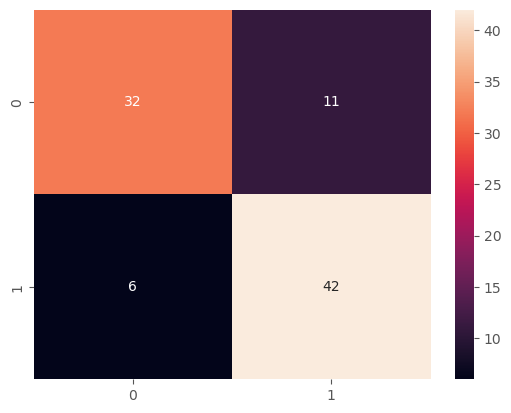

In [107]:
print('Accuracy score',accuracy_score(y1_test, preds1))
print('Recall score',recall_score(y1_test, preds1))
print('Precision score',precision_score(y1_test, preds1))
print('f1 score',f1_score(y1_test, preds1))
cm = confusion_matrix(y1_test,preds1)
sns.heatmap(cm,annot=True)

#### Random Forests with original data

In [108]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=5,)
cv_score = cross_val_score(rfc, X, y, cv=5)
print(cv_score)
print('\nAverage score: ',cv_score.mean())

[0.83606557 0.8852459  0.83333333 0.78333333 0.75      ]

Average score:  0.8175956284153006


#### Random Forests with selected data

In [109]:
rfc1 = RandomForestClassifier(random_state=6)
cv_score1 = cross_val_score(rfc1, new_X, y, cv=5)
print(cv_score1)
print('\nAverage score: ',cv_score1.mean())

[0.81967213 0.91803279 0.81666667 0.81666667 0.75      ]

Average score:  0.8242076502732241


### Second Method -- Let us distribute the data into training and test datasets using the train_test_split() function.

#### Outlier Detection ---Since the dataset is not large, we cannot discard the outliers. We will treat the outliers as potential observations.

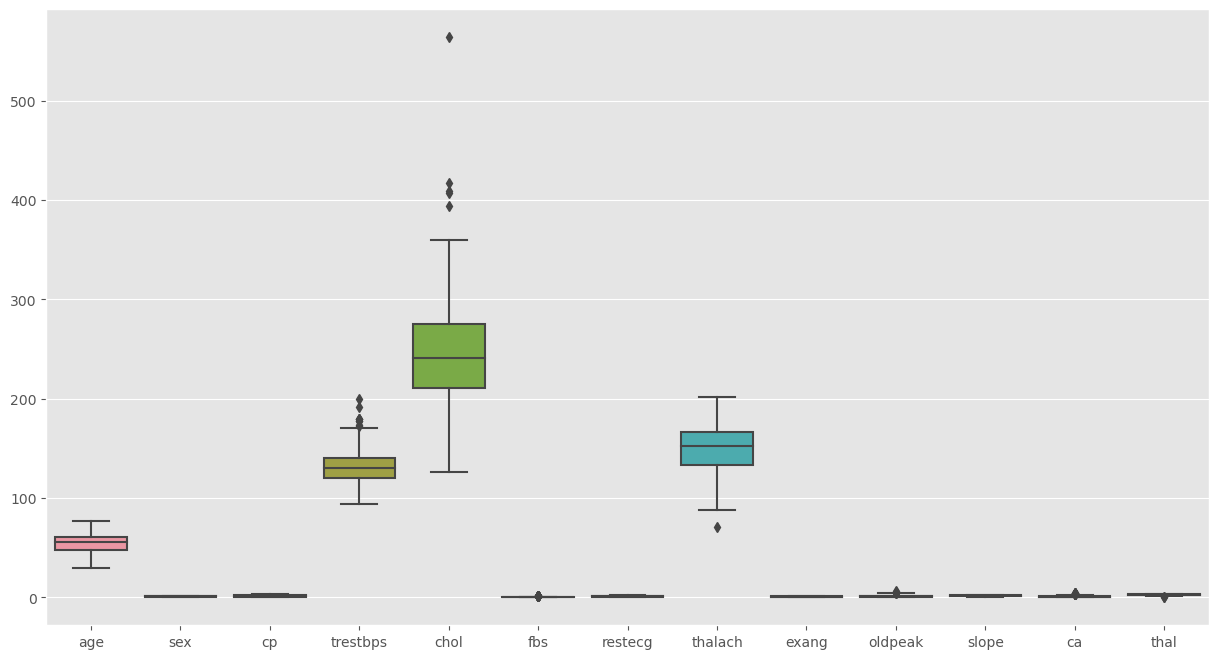

In [110]:
# Boxplots
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data=hcare, ax=ax);

### Logistic Regression

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=7)

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [114]:
pred = lr.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [116]:
# Accuracy on Test data
accuracy_score(y_test, pred)

0.8032786885245902

In [117]:
# Accuracy on Train data
accuracy_score(y_train, lr.predict(X_train))

0.8506224066390041

### Building a predictive system

In [118]:
import warnings
in_data = (57,0,0,140,241,0,1,123,1,0.2,1,0,3)

# Changing the input data into a numpy array
in_data_as_numpy_array = np.array(in_data)

# Reshaping the numpy array as we predict it
in_data_reshape = in_data_as_numpy_array.reshape(1,-1)
pred = lr.predict(in_data_reshape)
print(pred)

if(pred[0] == 0):
    print('The person does not have heart disease.')
else:
    print('The person has heart disease.')

[0]
The person does not have heart disease.
